# Import Libraries

In [1]:
import os  # Interact with the operating system.
import sys  # Read system parameters.
import warnings  # Suppress warnings
from time import time  # Calculate training time.

import folium  # Plot values on a map.
import matplotlib  # Create 2D charts.
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import pandas as pd  # Manipulate and analyze data.
import sklearn  # Perform data mining and analysis.
import yellowbrick  # Visualize elbow and silhouette plots.
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

warnings.filterwarnings("ignore")
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer

# Summarize software libraries used.
print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- Matplotlib {}".format(matplotlib.__version__))
print("- Folium {}".format(folium.__version__))
print("- Yellowbrick {}".format(yellowbrick.__version__))
print("- scikit-learn {}\n".format(sklearn.__version__))

Libraries used in this project:
- Python 3.8.18 | packaged by conda-forge | (default, Dec 23 2023, 17:23:49) 
[Clang 15.0.7 ]
- NumPy 1.24.3
- pandas 2.0.3
- Matplotlib 3.7.2
- Folium 0.18.0
- Yellowbrick 1.5
- scikit-learn 1.3.2



## Create the Dataset

To analyze the price of a home  through multiple inputs in King County, load the dataset into `DataFrame`. Once loaded as `DataFrame` the data can be explored and visualized with pandas.

In [2]:
X, y = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.05, random_state=41)
X = pd.DataFrame({"Col1": X[:, 0], "Col2": X[:, 1]})

**Examine Datatypes and Null Values**

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    1000 non-null   float64
 1   Col2    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


**Examine First 5 Records**

In [4]:
X.head()

,Col1,Col2
0,0.201460,0.958164
1,0.050975,0.305029
2,1.573935,-0.366780
3,-0.991440,0.094687
4,0.465245,-0.326029


**Spotlights** 

- There is a total of 1,000 samples available.
- To enhance realism, a degree of random noise has been incorporated into the distribution of the samples.
- The features are represented by two columns, which contain values in floating-point format.

## Chart the Dataset to Uncover its Characteristics.

Text(0, 0.5, 'Col2')

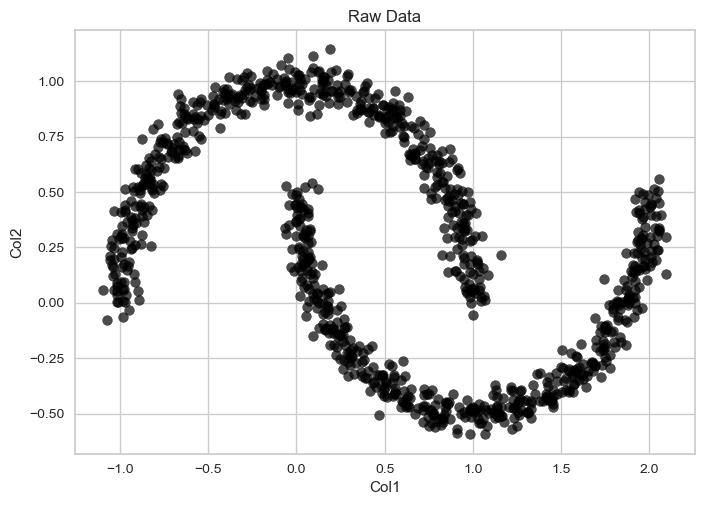

In [5]:
fig, ax = plt.subplots()

# Graph features
ax.scatter(
    X["Col1"], X["Col2"], marker="o", alpha=0.7, s=50, color="black", edgecolor="black"
)

# Label the Axes.
ax.set_title("Raw Data")
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])

- The structure of the data is represented in the form of two mirrored crescent moons.

## Cluster Every Dataset Row - Using HAC

This function operates similarly to the one utilized for generating clusters in the King County dataset, with the key distinction being the ability to choose between two types of clustering models: k-means or agglomerative. In the case of the agglomerative model, the parameter n_clusters remains consistent with its role in KMeans(), indicating the desired number of clusters. Additionally, the linkage parameter defines the criterion for linkage, determining the distance metric employed when assessing the similarity between two sets of data points. Specifically, this model adopts the single linkage method, which considers the minimum distance between all data points in the two sets, facilitating the identification of which clusters should be merged.

In [6]:
"""Generate the cluster labels accordingly."""


def generate_cluster_labels(algorithm, total_clusters, X):
    """Identify the appropriate model for generation."""
    if algorithm == "hac":
        model = AgglomerativeClustering(n_clusters=total_clusters, linkage="single")
    if algorithm == "kmeans":
        model = KMeans(n_clusters=total_clusters, init="k-means++", random_state=42)

    model.fit(X)
    labels = model.fit_predict(X)

    """Retrieve the initial DataFrame and add the cluster labels as a new column."""
    return labels


print("The function for producing cluster labels has been formulated.")

The function for producing cluster labels has been formulated.


## Graph Clusters

In [7]:
def graph_clusters():

    fig, ax = plt.subplots()

    # Caption clusters with varying colors.
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / 2)
    colors = cm.nipy_spectral(labels.astype(float) / 2)

    # Plot the features.
    ax.scatter(
        X["Col1"],
        X["Col2"],
        marker="o",
        alpha=0.7,
        s=50,
        color=colors,
        edgecolor="black",
    )

    # Labels Axes .
    ax.set_title("Clustered Data")
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])


print("The function to graph the clusters has been formulated.")

The function to graph the clusters has been formulated.


This function generates a plot of the data similar to previous instances. The distinction lies in line 15, where each cluster of the model is allocated a unique color through a built-in Matplotlib color map. Consequently, each data point will be represented in the color corresponding to its respective cluster.

### Develop a *K*-means Clustering Model and Visualize the Outcomes.

The nexts steps will create cluster labels for the moons dataset, presuming the existence of two distinct clusters then add the generated cluster labels as a new column in the original dataset and finally display a sample of rows from the dataset that includes the newly added cluster labels.

,Col1,Col2,c_label
0,0.201460,0.958164,0
1,0.050975,0.305029,0
2,1.573935,-0.366780,1
3,-0.991440,0.094687,0
4,0.465245,-0.326029,1


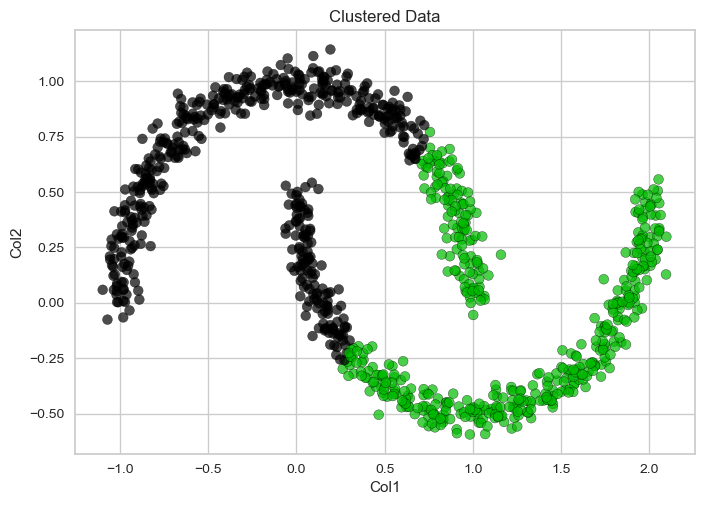

In [35]:
"""Create cluster labels"""

labels = generate_cluster_labels("kmeans", 2, X)

"""Add the generated cluster labels as a new column"""
labeled_clusters = X.assign(c_label=labels)

"""Display a sample of rows from the dataset"""
display(labeled_clusters.head())
graph_clusters()

**Spotlights** 

- A k-means clustering model produced two distinct clusters.
- The clusters appear to inadequately facilitate the differentiation between the crescents.
- Rather than effectively separating the crescents, the clusters seem to partition the entire feature space into two halves.

### Develop a Hierarchical Agglomerative Clustering Model and Visualize the Outcomes.

The nexts steps will create cluster labels for the moons dataset, presuming the existence of two distinct clusters then add the generated cluster labels as a new column in the original dataset and finally display a sample of rows from the dataset that includes the newly added cluster labels.

,Col1,Col2,c_label
0,0.201460,0.958164,0
1,0.050975,0.305029,1
2,1.573935,-0.366780,1
3,-0.991440,0.094687,0
4,0.465245,-0.326029,1


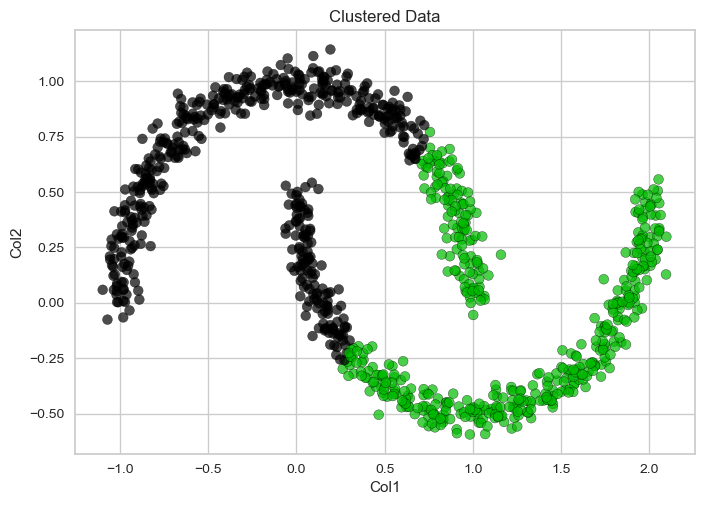

In [39]:
"""Create cluster labels"""

hac_labels = generate_cluster_labels("hac", 2, X)

"""Add the generated cluster labels as a new column"""
labeled_clusters = X.assign(c_label=hac_labels)

"""Display a sample of rows from the dataset"""
display(labeled_clusters.head())
graph_clusters()

**Spotlights** 

- A hierarchical agglomerative clustering (HAC) model was employed to create two distinct clusters.
- The resulting clusters appear to enhance the differentiation between the crescents.
- This approach effectively improves the clarity of the separation among the identified groups.